In [ ]:
"""
#Applying KNN algorithm
#Applying AutoEncoders --> UNet Encoders
#Checking GAN

#Use Ratserio to Read Image
#Checking the 11 layers of the Image
#Signatures file --> Shared Zip File
#Image CV applying
#Numpy arrays convertion
#Image Matplotlib applying and checking graphs
#Classes 4 --> Snow, Water, Debri, Cloud till now
#Preprocessing
#Raster images mosaik/ layers stack / band combinations
#Rescale raster pictures

Supervised---->(labelled data)

selection of desired band ------------------[1]

rescaling---→size of image(same), patchify/Segmentation -----------[2]

layer Stacking ------------------------------[3]

spectral recognition-----→Histogram---→ pattern recognition -----[4]

Spatial Recognition ----[Optional]

Fusion ---→final classification  ----[Last]

----------------------------------------------------------------------------------------------------------------------------

web GIS

Leaflet
"""


'\n#Applying KNN algorithm\n#Applying AutoEncoders --> UNet Encoders\n#Checking GAN\n\n#Use Ratserio to Read Image\n#Checking the 11 layers of the Image\n#Signatures file --> Shared Zip File\n#Image CV applying\n#Numpy arrays convertion\n#Image Matplotlib applying and checking graphs\n#Classes 4 --> Snow, Water, Debri, Cloud till now\n#Preprocessing\n#Raster images mosaik/ layers stack / band combinations\n#Rescale raster pictures\n\nSupervised---->(labelled data)\n\nselection of desired band ------------------[1]\n\nrescaling---→size of image(same), patchify/Segmentation -----------[2]\n\nlayer Stacking ------------------------------[3]\n\nspectral recognition-----→Histogram---→ pattern recognition -----[4]\n\nSpatial Recognition ----[Optional]\n|\n\n\nFusion ---→final classification  ----[Last]\n\n----------------------------------------------------------------------------------------------------------------------------\n\nweb GIS\n\nLeaflet\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sentinel_image = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'

#Selection of Desired Band

In [ ]:
!pip install rasterio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 50.7 MB/s eta 0:00:00


In [ ]:
#Aleesha
"""import rasterio
from rasterio.enums import Resampling
import cv2

# Open the multispectral image
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'  # Replace with the actual image path
src = rasterio.open(image_path)

# Read the multispectral bands
bands = src.read()

# Choose a specific band (adjust the index based on your requirements)
selected_band_index = 3  # Change this to the desired band index (0 to 5 for a 6-band image)
single_band_image = bands[selected_band_index]

# Save the single-band image
cv2.imwrite('single_band_image.png', single_band_image)

# Display the original and single-band images (for visualization purposes)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(bands[:3, :, :].transpose(1, 2, 0))  # Display RGB channels for visualization
ax[0].set_title('Original Multispectral Image')

ax[1].imshow(single_band_image, cmap='gray')
ax[1].set_title(f'Single Band (Band {selected_band_index + 1})')

plt.show()

# Close the rasterio dataset
src.close()
"""

"import rasterio\nfrom rasterio.enums import Resampling\nimport cv2\n\n# Open the multispectral image\nimage_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'  # Replace with the actual image path\nsrc = rasterio.open(image_path)\n\n# Read the multispectral bands\nbands = src.read()\n\n# Choose a specific band (adjust the index based on your requirements)\nselected_band_index = 3  # Change this to the desired band index (0 to 5 for a 6-band image)\nsingle_band_image = bands[selected_band_index]\n\n# Save the single-band image\ncv2.imwrite('single_band_image.png', single_band_image)\n\n# Display the original and single-band images (for visualization purposes)\nimport matplotlib.pyplot as plt\n\nfig, ax = plt.subplots(1, 2, figsize=(10, 5))\nax[0].imshow(bands[:3, :, :].transpose(1, 2, 0))  # Display RGB channels for visualization\nax[0].set_title('Original Multispectral Image')\n\nax[1].imshow(single_band_image, cmap='gray')\nax[1].set_title(f'Single Band (Ban

In [ ]:
import rasterio
from rasterio.enums import Resampling
import cv2
from matplotlib import pyplot as plt
import numpy as np
from rasterio.plot import show
from sklearn.cluster import KMeans


Image Shape: (6, 2795, 3907)
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Coordinate Reference System (CRS): EPSG:4326


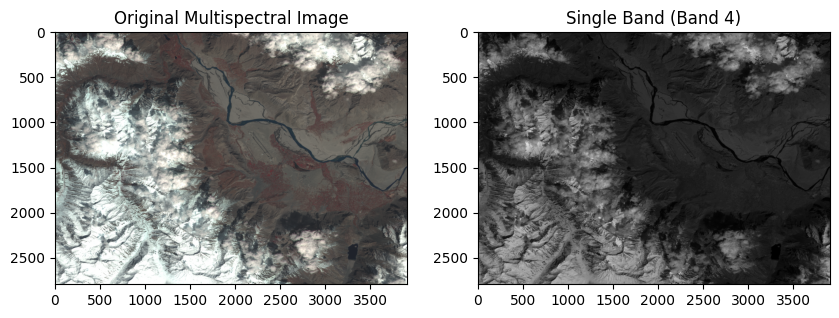

In [ ]:
import rasterio
import cv2
import matplotlib.pyplot as plt

def read_image(image_path, selected_band_indices):
    try:
        # Open the multispectral image
        src = rasterio.open(image_path)

        # Read the multispectral bands
        bands = src.read()

        # Choose specific bands for RGB visualization
        rgb_bands = bands[selected_band_indices]

        # Normalize the data for displaying RGB image
        rgb_image = (rgb_bands.clip(0, 10000) / 10000).transpose(1, 2, 0)

        # Display metadata information
        print(f"Image Shape: {bands.shape}")
        print(f"Resolution: {src.res}")
        print(f"Coordinate Reference System (CRS): {src.crs}")

        # Display the original multispectral image
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        ax[0].imshow(rgb_image)
        ax[0].set_title('Original Multispectral Image')

        # Save the RGB image
        cv2.imwrite('rgb_image.png', (rgb_image * 255).astype(np.uint8))

        # Display the single-band image
        ax[1].imshow(bands[selected_band_indices[0]], cmap='gray')  # Display the first selected band as a sample
        ax[1].set_title(f'Single Band (Band {selected_band_indices[0] + 1})')

        plt.show()

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the rasterio dataset
        if src:
            src.close()

# Specify the image path and selected band indices for RGB visualization
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'
selected_band_indices = [3, 2, 1]  # Select appropriate bands for RGB visualization

# Read and visualize the image
read_image(image_path, selected_band_indices)


Image Shape: (6, 2795, 3907)
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Coordinate Reference System (CRS): EPSG:4326


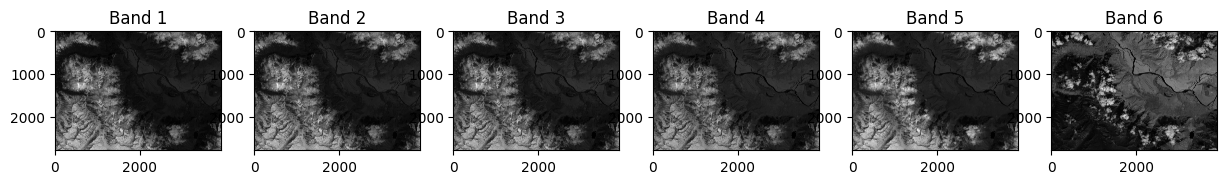

In [ ]:
#Usman
#Checking the 11 layers of the Image

def visualize_bands(image_path):
    try:
        # Open the multispectral image
        src = rasterio.open(image_path)

        # Read the multispectral bands
        bands = src.read()

        # Display metadata information
        print(f"Image Shape: {bands.shape}")
        print(f"Resolution: {src.res}")
        print(f"Coordinate Reference System (CRS): {src.crs}")

        # Visualize each band separately
        num_bands = bands.shape[0]
        fig, axes = plt.subplots(1, num_bands, figsize=(15, 5))

        for i in range(num_bands):
            axes[i].imshow(bands[i, :, :], cmap='gray')
            axes[i].set_title(f'Band {i + 1}')

        plt.show()

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the rasterio dataset
        if src:
            src.close()


# Visualize the bands
visualize_bands(image_path)





In [ ]:
#Usman
#Checking number of bands in your Sentinel-2 image

def get_band_count(image_path):
    try:
        # Open the multispectral image
        src = rasterio.open(image_path)

        # Get the number of bands
        num_bands = src.count

        print(f"Number of Bands: {num_bands}")

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the rasterio dataset
        if src:
            src.close()

# Get the number of bands
get_band_count(image_path)



Number of Bands: 6


In [ ]:
"""Usman

Debris Detection:

Bands: Use the available bands, e.g., 6 (Red), 5 (NIR), 2 (Blue).
Debris on glaciers may have different reflectance properties in visible and NIR bands.
Snow and Ice:

Bands: Use the available bands, e.g., 6 (Red), 5 (NIR), 4 (Green).
These bands can help in distinguishing snow and ice.
Water Bodies:

Bands: Use the available bands, e.g., 5 (NIR), 8 (SWIR), 2 (Blue).
NIR and SWIR bands are useful for identifying water bodies.
Cloud Detection:

Bands: Use the available bands, e.g., 8 (SWIR), 10 (SWIR), 2 (Blue).
SWIR bands are often sensitive to cloud detection.
"""

'Usman\n\nDebris Detection:\n\nBands: Use the available bands, e.g., 6 (Red), 5 (NIR), 2 (Blue).\nDebris on glaciers may have different reflectance properties in visible and NIR bands.\nSnow and Ice:\n\nBands: Use the available bands, e.g., 6 (Red), 5 (NIR), 4 (Green).\nThese bands can help in distinguishing snow and ice.\nWater Bodies:\n\nBands: Use the available bands, e.g., 5 (NIR), 8 (SWIR), 2 (Blue).\nNIR and SWIR bands are useful for identifying water bodies.\nCloud Detection:\n\nBands: Use the available bands, e.g., 8 (SWIR), 10 (SWIR), 2 (Blue).\nSWIR bands are often sensitive to cloud detection.\n'

Image Shape: (6, 2795, 3907)
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Coordinate Reference System (CRS): EPSG:4326


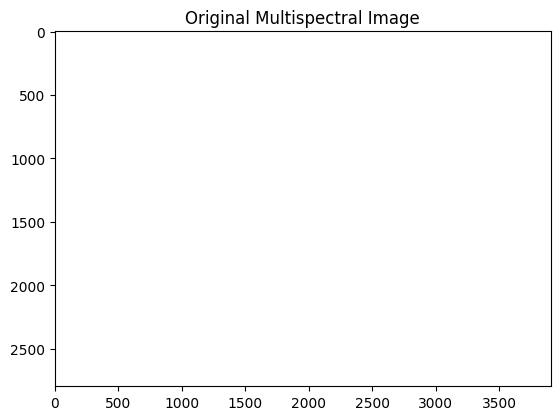

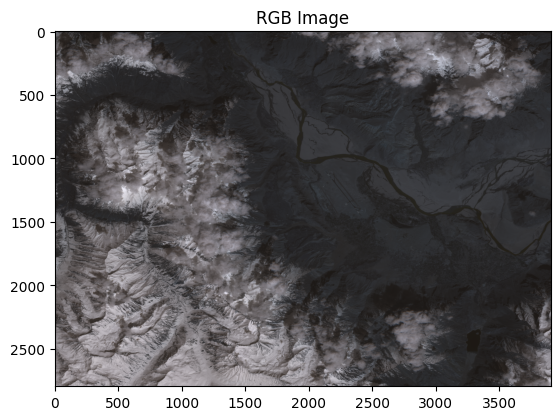

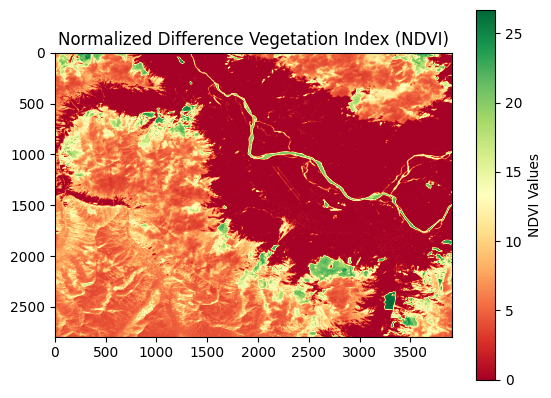

In [ ]:
import rasterio
import cv2
import matplotlib.pyplot as plt
import numpy as np

def read_image_and_calculate_ndvi(image_path, red_band_index, nir_band_index):
    try:
        # Open the multispectral image
        src = rasterio.open(image_path)

        # Read the multispectral bands
        bands = src.read()

        # Choose the red and NIR bands
        red_band = bands[red_band_index]
        nir_band = bands[nir_band_index]

        # Calculate NDVI
        ndvi = (nir_band - red_band) / (nir_band + red_band)

        # Display metadata information
        print(f"Image Shape: {bands.shape}")
        print(f"Resolution: {src.res}")
        print(f"Coordinate Reference System (CRS): {src.crs}")

        # Display the original multispectral image
        plt.imshow(bands[:3, :, :].transpose(1, 2, 0))
        plt.title('Original Multispectral Image')
        plt.show()

        # Display RGB channels for visualization
        rgb_image = bands[:3, :, :].transpose(1, 2, 0)

        # Normalize the pixel values to the range [0, 1]
        rgb_image_normalized = rgb_image / rgb_image.max()

        # Show the RGB image
        plt.imshow(rgb_image_normalized)
        plt.title('RGB Image')
        plt.show()

        # Display the NDVI image
        plt.imshow(ndvi, cmap='RdYlGn')
        plt.title('Normalized Difference Vegetation Index (NDVI)')
        plt.colorbar(label='NDVI Values')
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the rasterio dataset
        if src:
            src.close()

# Specify the image path and bands for NDVI calculation
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'
red_band_index = 2  # Replace with the actual index of the red band
nir_band_index = 5  # Replace with the actual index of the NIR band

# Read the image and calculate NDVI
read_image_and_calculate_ndvi(image_path, red_band_index, nir_band_index)


Image Shape: (6, 2795, 3907)
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Coordinate Reference System (CRS): EPSG:4326


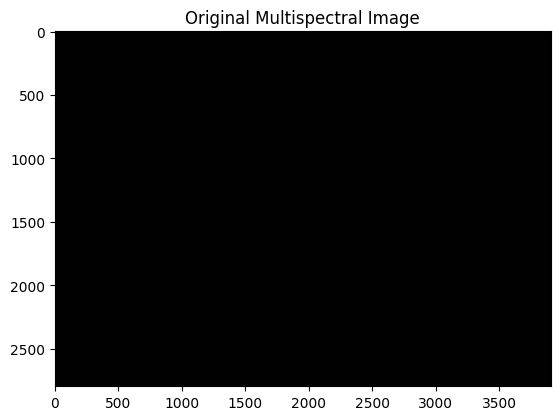

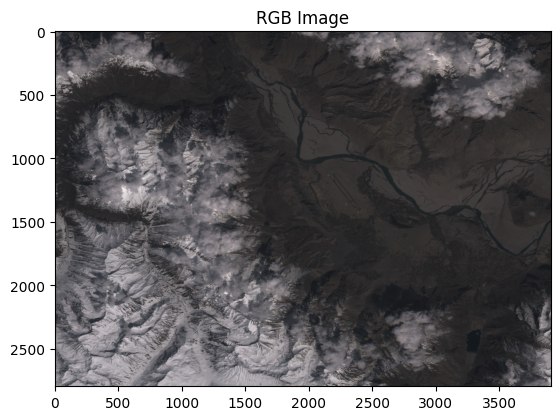

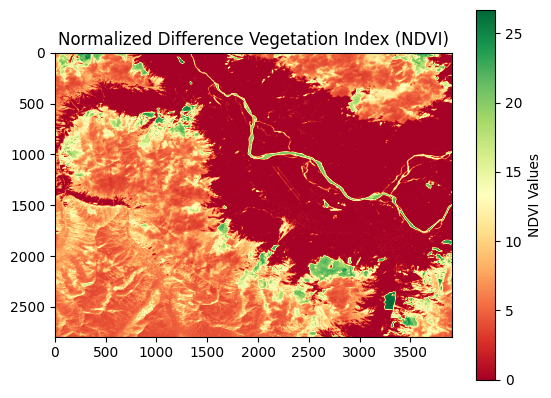

In [ ]:

import rasterio
import cv2
import matplotlib.pyplot as plt
import numpy as np

def read_image_and_calculate_ndvi(image_path, red_band_index, nir_band_index):
    try:
        # Open the multispectral image
        src = rasterio.open(image_path)

        # Read the multispectral bands
        bands = src.read()

        # Choose the red and NIR bands
        red_band = bands[red_band_index]
        nir_band = bands[nir_band_index]

        # Calculate NDVI
        ndvi = (nir_band - red_band) / (nir_band + red_band)

        # Display metadata information
        print(f"Image Shape: {bands.shape}")
        print(f"Resolution: {src.res}")
        print(f"Coordinate Reference System (CRS): {src.crs}")

        # Display the original multispectral image
        plt.imshow(np.clip(bands[:3, :, :].transpose(1, 2, 0), 0, 1))
        plt.title('Original Multispectral Image')
        plt.show()

        # Display RGB channels for visualization
        rgb_image = bands[2::-1, :, :].transpose(1, 2, 0)

        # Normalize the pixel values to the range [0, 1]
        rgb_image_normalized = rgb_image / rgb_image.max()

        # Show the RGB image
        plt.imshow(np.clip(rgb_image_normalized, 0, 1))
        plt.title('RGB Image')
        plt.show()

        # Display the NDVI image
        plt.imshow(ndvi, cmap='RdYlGn')
        plt.title('Normalized Difference Vegetation Index (NDVI)')
        plt.colorbar(label='NDVI Values')
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the rasterio dataset
        if src:
            src.close()

# Specify the image path and bands for NDVI calculation
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'
red_band_index = 2  # Replace with the actual index of the red band
nir_band_index = 5  # Replace with the actual index of the NIR band

# Read the image and calculate NDVI
read_image_and_calculate_ndvi(image_path, red_band_index, nir_band_index)




Image Shape: (6, 2795, 3907)
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Coordinate Reference System (CRS): EPSG:4326


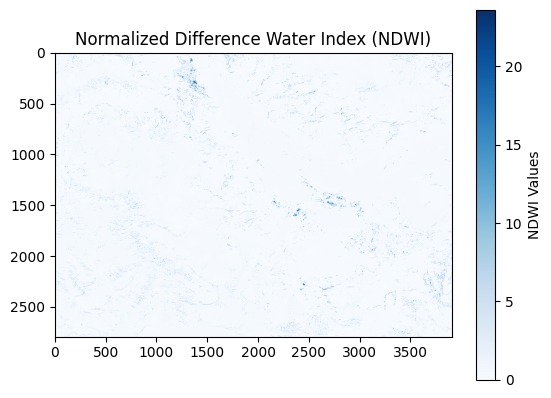

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# NDWI (Normalized Difference Water Index) Calculation
def calculate_ndwi(green_band, nir_band):
    ndwi = (green_band - nir_band) / (green_band + nir_band)
    return ndwi

try:
    # Open the multispectral image
    src = rasterio.open('/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif')  # Replace with your image path

    # Read the multispectral bands
    bands = src.read()

    # Choose the green and NIR bands
    green_band_index = 2  # Replace with the actual index of the green band
    nir_band_index = 4    # Replace with the actual index of the NIR band

    green_band = bands[green_band_index]
    nir_band = bands[nir_band_index]

    # Calculate NDWI
    ndwi = calculate_ndwi(green_band, nir_band)

    # Display metadata information
    print(f"Image Shape: {bands.shape}")
    print(f"Resolution: {src.res}")
    print(f"Coordinate Reference System (CRS): {src.crs}")

    # Display the NDWI image
    plt.imshow(ndwi, cmap='Blues')
    plt.title('Normalized Difference Water Index (NDWI)')
    plt.colorbar(label='NDWI Values')
    plt.show()

except Exception as e:
    print(f"Error: {e}")

finally:
    # Close the rasterio dataset
    if src:
        src.close()


Image Shape: (6, 2795, 3907)
Resolution: (8.983152841195215e-05, 8.983152841195215e-05)
Coordinate Reference System (CRS): EPSG:4326


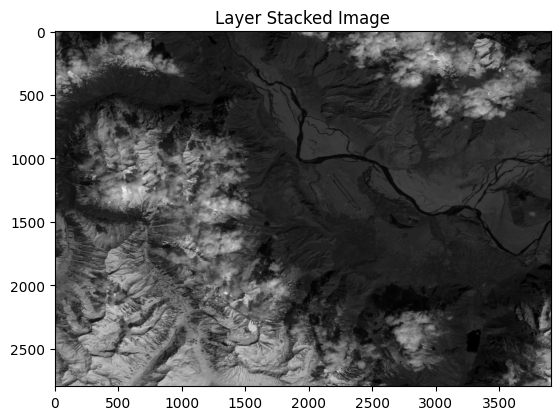

In [ ]:
# Function to perform layer stacking
def stack_layers(image_path, selected_bands):
    try:
        # Open the multispectral image
        src = rasterio.open(image_path)

        # Read selected bands
        bands = src.read(selected_bands)

        # Display metadata information
        print(f"Image Shape: {bands.shape}")
        print(f"Resolution: {src.res}")
        print(f"Coordinate Reference System (CRS): {src.crs}")

        # Stack the bands into a single channel image
        stacked_image = np.mean(bands, axis=0)

        # Save the stacked image
        stacked_image_path = 'stacked_image.png'
        plt.imsave(stacked_image_path, stacked_image, cmap='gray')

        # Display the stacked image
        plt.imshow(stacked_image, cmap='gray')
        plt.title('Layer Stacked Image')
        plt.show()

        return stacked_image_path

    except Exception as e:
        print(f"Error: {e}")

    finally:
        # Close the rasterio dataset
        if src:
            src.close()

# Specify the image path and bands to stack
selected_bands = [1, 2, 3, 4, 5, 6]  # Replace with the indices of bands to stack

# Perform layer stacking
stacked_image_path = stack_layers(image_path, selected_bands)


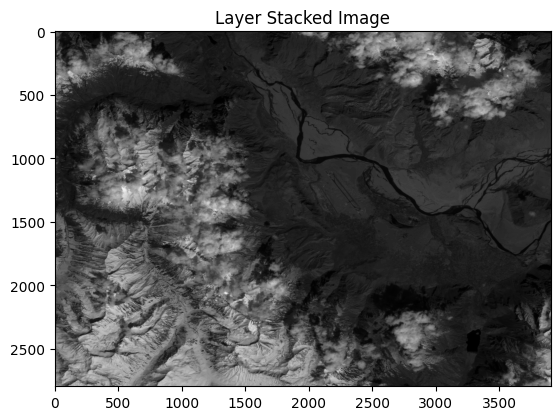

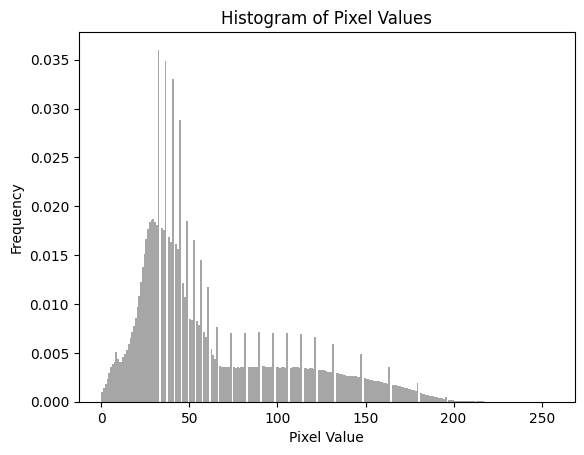

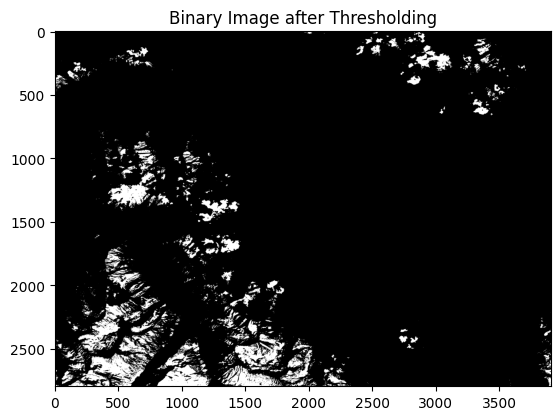

In [ ]:
"""
Loads the stacked image.
Displays the stacked image.
Flattens the image to a 1D array.
Plots the histogram of pixel values.
Applies pattern recognition (thresholding in this case) based on histogram analysis

"""
# Load the stacked image
stacked_image = cv2.imread('stacked_image.png', cv2.IMREAD_GRAYSCALE)

# Display the stacked image
plt.imshow(stacked_image, cmap='gray')
plt.title('Layer Stacked Image')
plt.show()

# Flatten the image to a 1D array
pixel_values = stacked_image.flatten()

# Plot the histogram
plt.hist(pixel_values, bins=256, range=[0, 256], density=True, color='gray', alpha=0.7)
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

# Apply pattern recognition based on histogram analysis
# You can define thresholds or patterns based on the histogram information
# For example, identifying peaks or specific ranges of pixel values

# Example: Thresholding based on a specific value (adjust as needed)
threshold_value = 150
binary_image = (stacked_image > threshold_value).astype(np.uint8) * 255

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image after Thresholding')
plt.show()


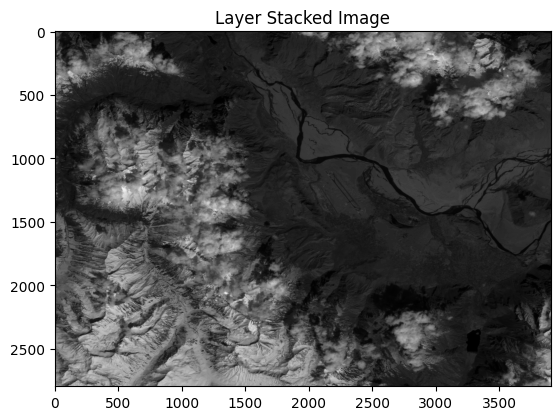

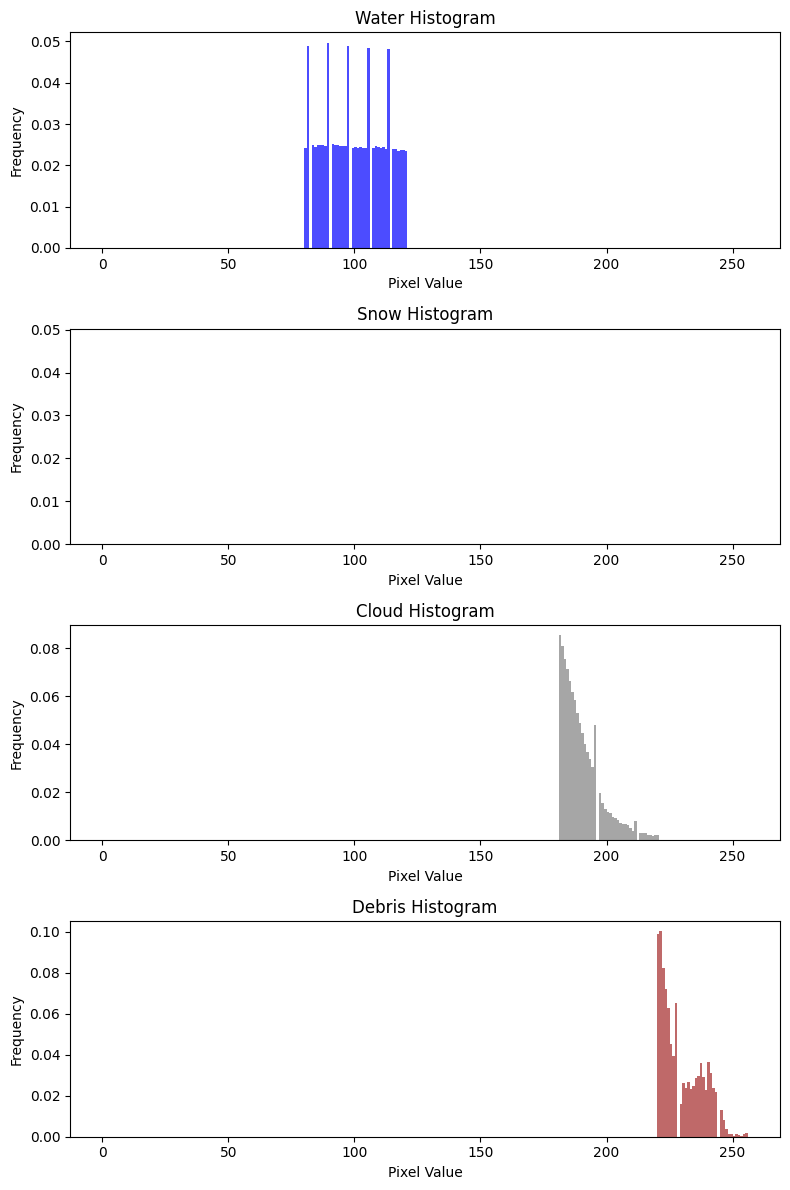

In [ ]:
# Load the stacked image
stacked_image = cv2.imread('stacked_image.png', cv2.IMREAD_GRAYSCALE)

# Display the stacked image
plt.imshow(stacked_image, cmap='gray')
plt.title('Layer Stacked Image')
plt.show()

# Define pixel value ranges for each class
water_range = (80, 120)
snow_range = (120, 180)
cloud_range = (180, 220)
debris_range = (220, 255)

# Create masks for each class
water_mask = cv2.inRange(stacked_image, *water_range)
snow_mask = cv2.inRange(stacked_image, *snow_range)
cloud_mask = cv2.inRange(stacked_image, *cloud_range)
debris_mask = cv2.inRange(stacked_image, *debris_range)

# Plot histograms for each class
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Water Histogram
axs[0].hist(stacked_image[water_mask == 255], bins=256, range=[0, 256], density=True, color='blue', alpha=0.7)
axs[0].set_title('Water Histogram')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')

# Snow Histogram
axs[1].hist(stacked_image[snow_mask == 255], bins=256, range=[0, 256], density=True, color='white', alpha=0.7)
axs[1].set_title('Snow Histogram')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')

# Cloud Histogram
axs[2].hist(stacked_image[cloud_mask == 255], bins=256, range=[0, 256], density=True, color='gray', alpha=0.7)
axs[2].set_title('Cloud Histogram')
axs[2].set_xlabel('Pixel Value')
axs[2].set_ylabel('Frequency')

# Debris Histogram
axs[3].hist(stacked_image[debris_mask == 255], bins=256, range=[0, 256], density=True, color='brown', alpha=0.7)
axs[3].set_title('Debris Histogram')
axs[3].set_xlabel('Pixel Value')
axs[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


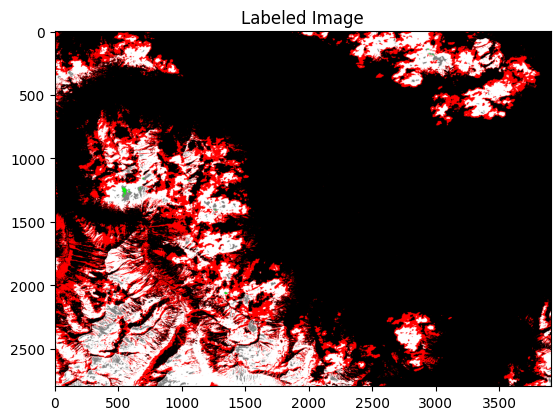

In [ ]:
"""Usman Ghias"""

# Load the stacked image
stacked_image = cv2.imread('stacked_image.png', cv2.IMREAD_GRAYSCALE)

# Define pixel value ranges for each class
water_range = (80, 120)
snow_range = (120, 180)
cloud_range = (180, 220)
debris_range = (220, 255)

# Create masks for each class
water_mask = cv2.inRange(stacked_image, *water_range)
snow_mask = cv2.inRange(stacked_image, *snow_range)
cloud_mask = cv2.inRange(stacked_image, *cloud_range)
debris_mask = cv2.inRange(stacked_image, *debris_range)

# Create a labeled image with different colors for each class
labeled_image = np.zeros((stacked_image.shape[0], stacked_image.shape[1], 3), dtype=np.uint8)

# Assign colors based on masks
labeled_image[water_mask == 255] = [0, 0, 255]  # Blue for water
labeled_image[snow_mask == 255] = [255, 255, 255]  # White for snow
labeled_image[cloud_mask == 255] = [128, 128, 128]  # Gray for cloud
labeled_image[debris_mask == 255] = [0, 255, 0]  # Green for debris

# Display the labeled image
plt.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
plt.title('Labeled Image')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


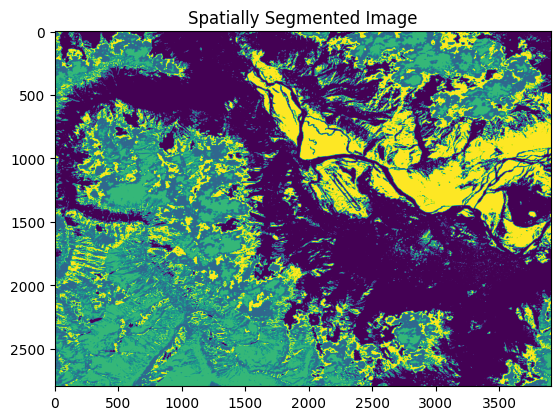

In [ ]:
"""Usman Ghias"""


# Load the stacked image
stacked_image = cv2.imread('stacked_image.png', cv2.IMREAD_COLOR)

# Reshape the image to a 2D array of pixels
pixels = stacked_image.reshape((-1, 3))

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters based on your classes
kmeans.fit(pixels)

# Assign labels to each pixel
segmented_image = kmeans.labels_.reshape(stacked_image.shape[:2])

# Visualize the segmented image
plt.imshow(segmented_image, cmap='viridis')  # Adjust the colormap as needed
plt.title('Spatially Segmented Image')
plt.show()


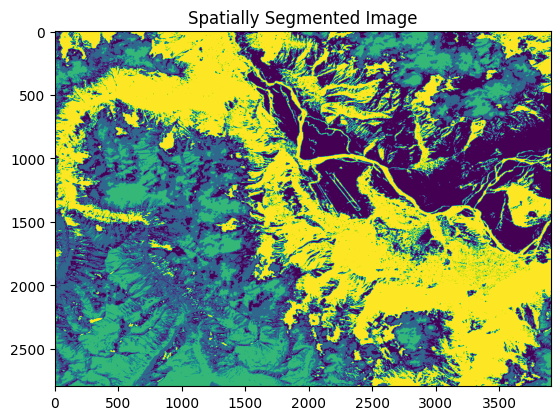

In [ ]:
"""Usman Ghias"""
#Removed Warning


# Load the stacked image
stacked_image = cv2.imread('stacked_image.png', cv2.IMREAD_COLOR)

# Reshape the image to a 2D array of pixels
pixels = stacked_image.reshape((-1, 3))

# Apply K-Means clustering with explicit n_init value
kmeans = KMeans(n_clusters=4, n_init=10)  # Adjust the number of clusters and n_init as needed
kmeans.fit(pixels)

# Assign labels to each pixel
segmented_image = kmeans.labels_.reshape(stacked_image.shape[:2])

# Visualize the segmented image
plt.imshow(segmented_image, cmap='viridis')  # Adjust the colormap as needed
plt.title('Spatially Segmented Image')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


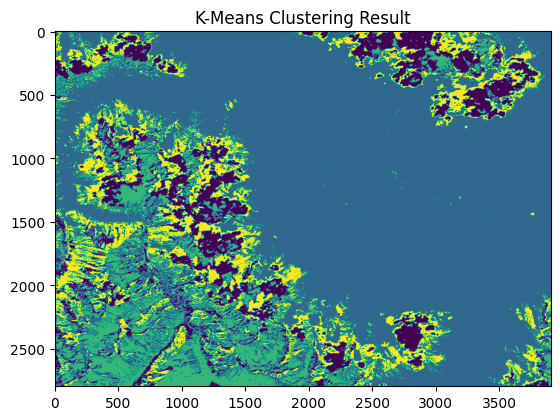

In [ ]:

# Open the multispectral image
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'
src = rasterio.open(image_path)

# Read the multispectral bands
bands = src.read()

# Reshape the data for clustering
reshaped_data = bands.transpose(1, 2, 0).reshape(-1, bands.shape[0])

# Perform k-means clustering
n_clusters = 4  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(reshaped_data)

# Reshape the labels back to the original image shape
clustered_image = labels.reshape(bands.shape[1], bands.shape[2])

# Display the clustered image
plt.imshow(clustered_image, cmap='viridis')  # Adjust the cmap as needed
plt.title('K-Means Clustering Result')
plt.show()

# Close the rasterio dataset
src.close()

Converting to vector Data Using Rasterio

In [ ]:
import rasterio
import numpy as np

# Define the path to your Sentinel-2 image
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'

# Open the image using rasterio
with rasterio.open(image_path) as src:
    # Read the image data as a numpy array
    image_data = src.read()

# Check the shape of the array (should be (num_bands, height, width))
print("Shape of the image data array:", image_data.shape)

# Separate the bands
band_arrays = []
for band in range(image_data.shape[0]):
    band_arrays.append(image_data[band, :, :])

# Convert the list of arrays to numpy arrays
band_arrays = np.array(band_arrays)

# Check the shape of one of the band arrays
print("Shape of one band array:", band_arrays[0].shape)



Shape of the image data array: (6, 2795, 3907)
Shape of one band array: (2795, 3907)


Shows that we have 6 bands each with 2 dimensions

In [ ]:
# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

# Display the shape of the image data array
print("Shape of the image data array:", image_data.shape)

# Iterate through each band and create a separate numpy array
band_arrays = []
for band_index in range(image_data.shape[0]):
    band_array = image_data[band_index, :, :]
    band_arrays.append(band_array)
    # Display the shape of one band array
    print(f"Shape of band {band_index + 1} array:", band_array.shape)

# Convert the list of band arrays to a numpy array
bands_np_array = np.array(band_arrays)

# Now, bands_np_array will have shape (6, 2795, 3907), where each element is a band array


Shape of the image data array: (6, 2795, 3907)
Shape of band 1 array: (2795, 3907)
Shape of band 2 array: (2795, 3907)
Shape of band 3 array: (2795, 3907)
Shape of band 4 array: (2795, 3907)
Shape of band 5 array: (2795, 3907)
Shape of band 6 array: (2795, 3907)


In [ ]:
# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

# Display the total number of pixels in the image
total_pixels = np.prod(image_data.shape[1:])
print("Total number of pixels in the image:", total_pixels)

# Iterate through each band and display pixel values for specific points
points_to_display = [(1, 2), (3, 4), (1000, 2000)]  # Add more points as needed

for band_index in range(image_data.shape[0]):
    print(f"\nPixel values for band {band_index + 1}:")
    for point in points_to_display:
        pixel_value = image_data[band_index, point[0], point[1]]
        print(f"Band {band_index + 1} - Point {point}: {pixel_value}")

Total number of pixels in the image: 10920065

Pixel values for band 1:
Band 1 - Point (1, 2): 3713
Band 1 - Point (3, 4): 6051
Band 1 - Point (1000, 2000): 4032

Pixel values for band 2:
Band 2 - Point (1, 2): 3562
Band 2 - Point (3, 4): 6240
Band 2 - Point (1000, 2000): 4048

Pixel values for band 3:
Band 3 - Point (1, 2): 3571
Band 3 - Point (3, 4): 6459
Band 3 - Point (1000, 2000): 4308

Pixel values for band 4:
Band 4 - Point (1, 2): 3857
Band 4 - Point (3, 4): 6035
Band 4 - Point (1000, 2000): 4431

Pixel values for band 5:
Band 5 - Point (1, 2): 3161
Band 5 - Point (3, 4): 3161
Band 5 - Point (1000, 2000): 2751

Pixel values for band 6:
Band 6 - Point (1, 2): 2957
Band 6 - Point (3, 4): 2066
Band 6 - Point (1000, 2000): 5080


Pixel values for each band at specific points:

For each band (from 1 to 6), the code prints the pixel values at three specific points: (1, 2), (3, 4), and (1000, 2000).

For example, for Band 1:

At point (1, 2), the pixel value is 3713.
At point (3, 4), the pixel value is 6051.
At point (1000, 2000), the pixel value is 4032.
The same pattern follows for Bands 2 to 6, each showing the pixel values at the specified points.

In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

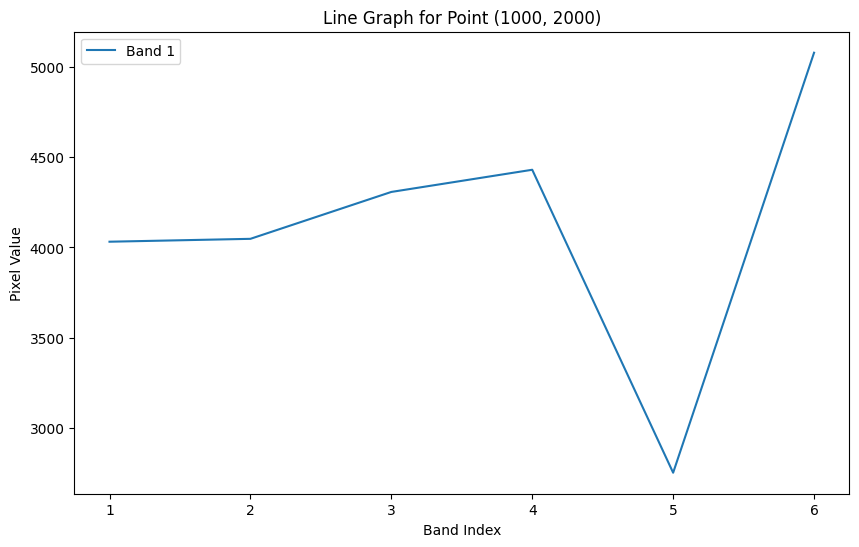

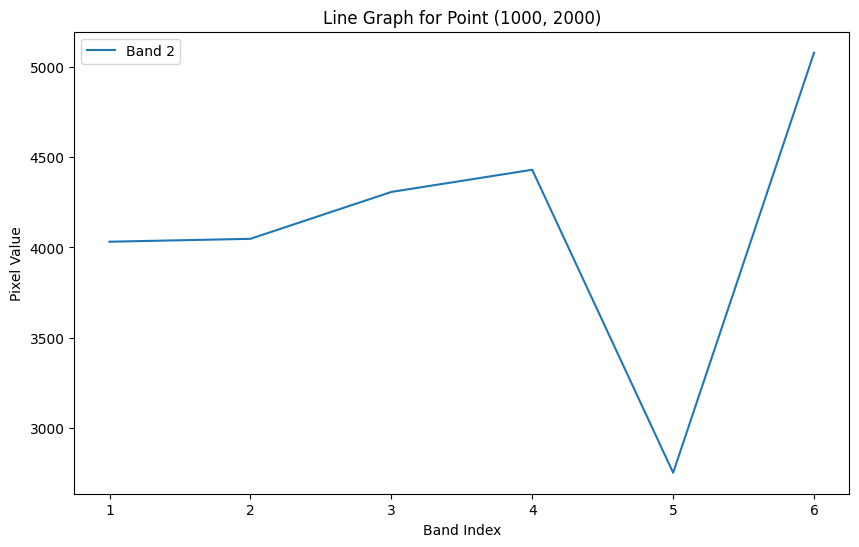

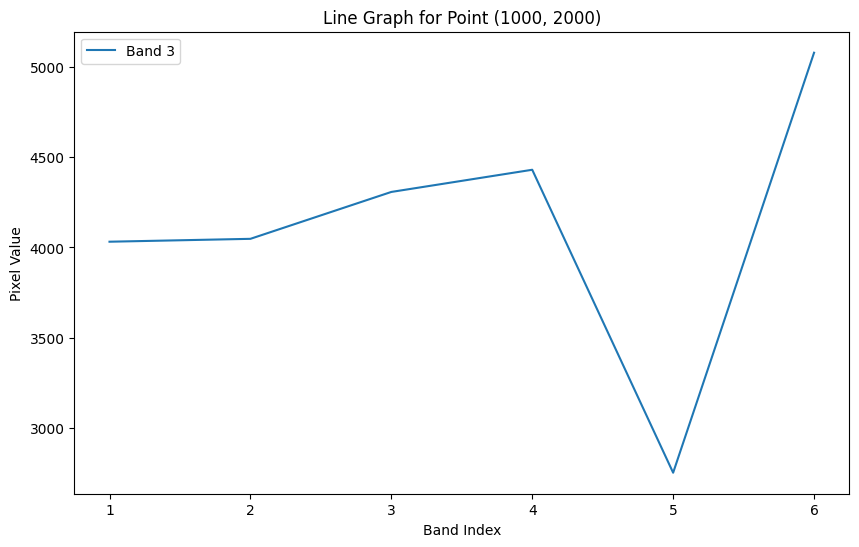

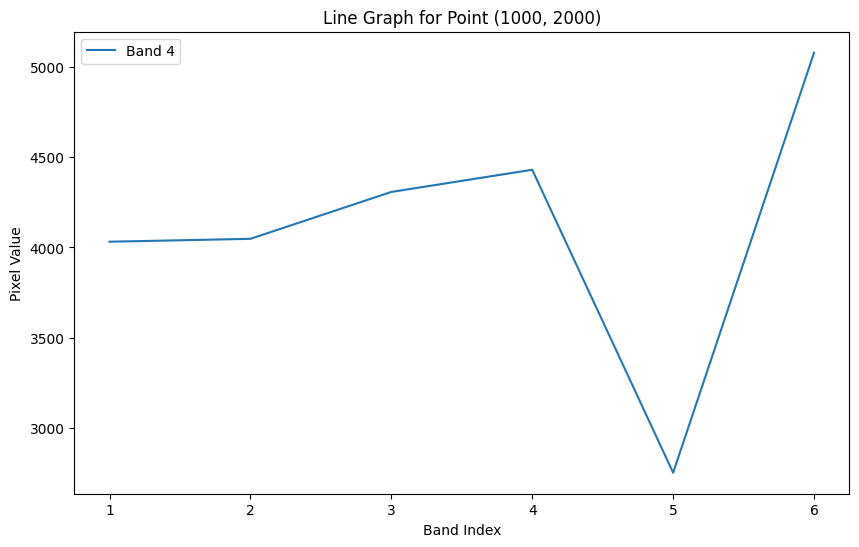

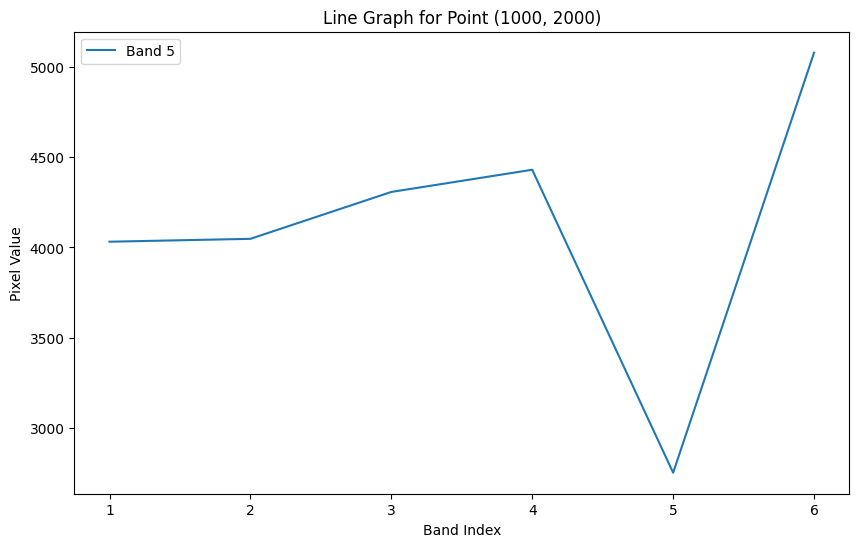

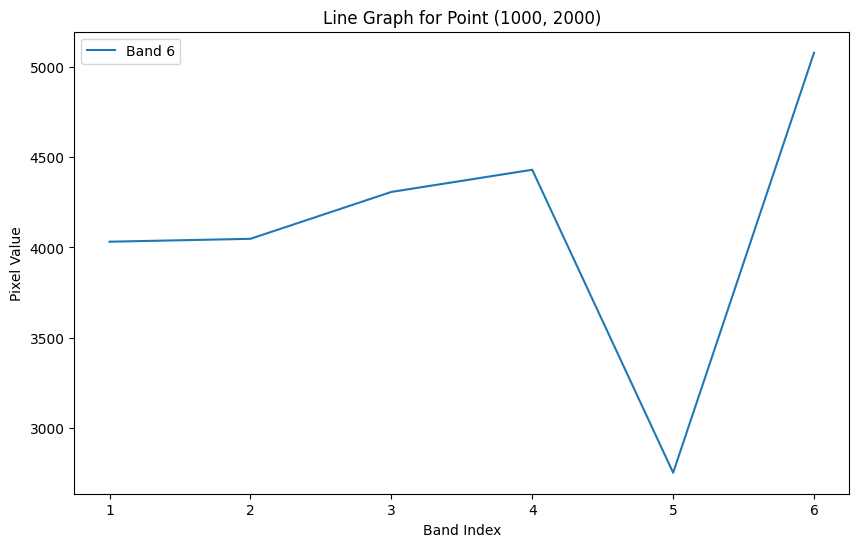

In [ ]:


# Define the path to your Sentinel-2 image
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'

# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

# Function to plot line graph for a specific band and point
def plot_line_graph(band_index, point):
    plt.figure(figsize=(10, 6))

    # Get pixel values for each band at the specified point
    pixel_values = image_data[:, point[0], point[1]]

    # Ensure that the point coordinates are within the valid range
    if point[0] < image_data.shape[1] and point[1] < image_data.shape[2]:
        # Check if pixel_values is 1-dimensional or 2-dimensional
        if len(pixel_values.shape) == 1:
            x_values = np.arange(1, len(pixel_values) + 1)
            y_values = pixel_values
        else:
            x_values = np.arange(1, pixel_values.shape[1] + 1)
            y_values = pixel_values[band_index, :]

        # Plot the line graph for the specified band and point
        plt.plot(x_values, y_values, label=f'Band {band_index + 1}')
        plt.title(f'Line Graph for Point {point}')
        plt.xlabel('Band Index')
        plt.ylabel('Pixel Value')
        plt.legend()
        plt.show()
    else:
        print(f"Error: The specified point {point} is out of image range.")

# Specify the point for the line chart (you can change this)
point_to_display = (1000, 2000)

# Plot the line graph for the specified point for each band
for band_to_display in range(image_data.shape[0]):
    plot_line_graph(band_to_display, point_to_display)


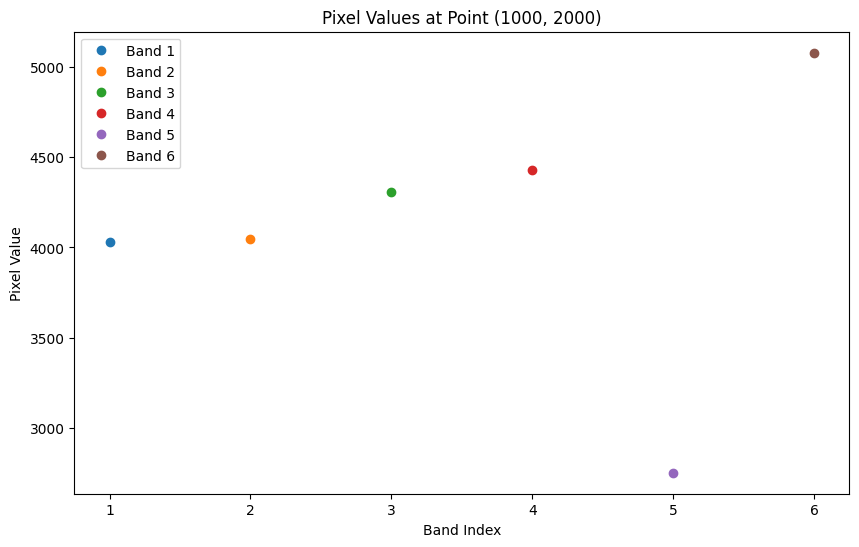

(1000, 2000)


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your Sentinel-2 image
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'

# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

# Function to plot line graph for a specific point
def plot_line_graph(point):
    plt.figure(figsize=(10, 6))

    # Iterate through bands
    for band_index in range(image_data.shape[0]):
        # Get the pixel value at the specified point
        pixel_value = image_data[band_index, point[0], point[1]]

        # Plot the pixel value for each band
        plt.plot(band_index + 1, pixel_value, 'o', label=f'Band {band_index + 1}')

    # Set labels and legend
    plt.title(f'Pixel Values at Point {point}')
    plt.xlabel('Band Index')
    plt.ylabel('Pixel Value')
    plt.legend()
    plt.show()

# Specify the point for the line chart (you can change this)
point_to_display = (1000, 2000)

# Plot the line graph for the specified point
plot_line_graph(point_to_display)
print(point_to_display)


In [ ]:
import rasterio
import numpy as np

# Define the path to your Sentinel-2 image
image_path = '/content/drive/MyDrive/SentinalTwoImage/Sentinel2_Mar2023_Image.tif'

# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

# Specify the point for which you want to extract pixel values
point_to_display = (1000, 2000)

# Initialize lists to store pixel values for each band
pixel_values_by_band = []

# Iterate through bands
for band_index in range(image_data.shape[0]):
    # Get the pixel value at the specified point for the current band
    pixel_value = image_data[band_index, point_to_display[0], point_to_display[1]]
    pixel_values_by_band.append(pixel_value)

# Print the pixel values for each band at the specified point
for band_index, pixel_value in enumerate(pixel_values_by_band):
    print(f"Band {band_index + 1} - Pixel Value: {pixel_value}")


Band 1 - Pixel Value: 4032
Band 2 - Pixel Value: 4048
Band 3 - Pixel Value: 4308
Band 4 - Pixel Value: 4431
Band 5 - Pixel Value: 2751
Band 6 - Pixel Value: 5080


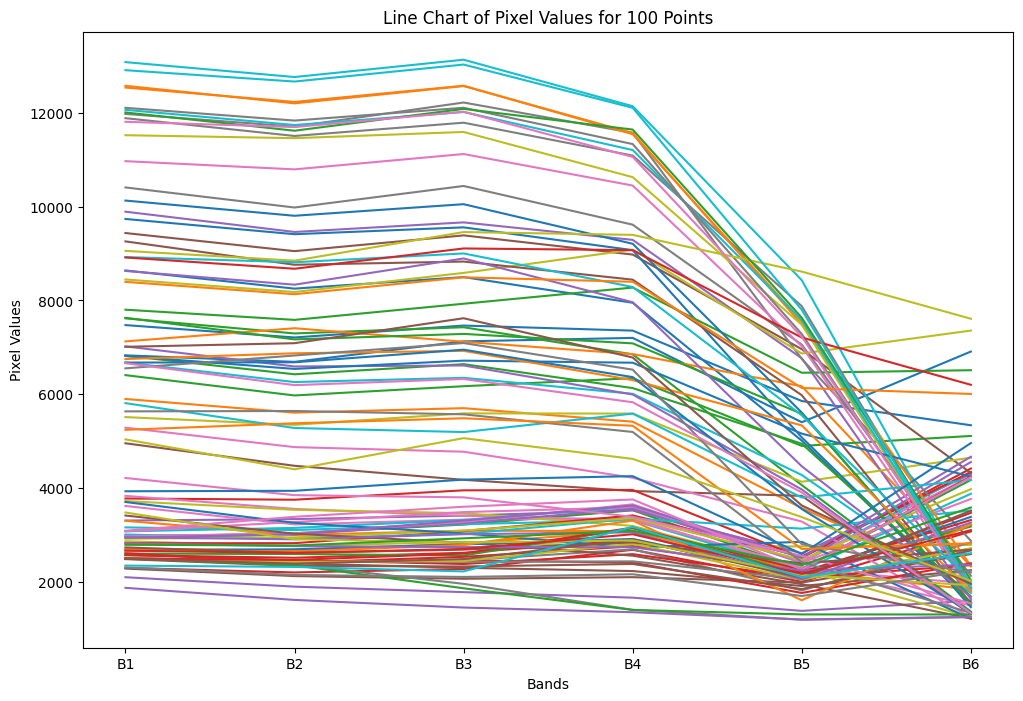

In [ ]:
# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image_data = src.read()

# Generate 100 random points for demonstration
np.random.seed(42)  # For reproducibility
points_to_display = np.random.randint(0, min(image_data.shape[1], image_data.shape[2]), size=(100, 2))

# Initialize a list to store pixel values for each point and each band
pixel_values_by_point = []

# Iterate through points
for point in points_to_display:
    pixel_values_by_band = []

    # Iterate through bands
    for band_index in range(image_data.shape[0]):
        # Get the pixel value at the current point for the current band
        pixel_value = image_data[band_index, point[0], point[1]]
        pixel_values_by_band.append(pixel_value)

    pixel_values_by_point.append(pixel_values_by_band)

# Convert the list to a NumPy array for easy indexing
pixel_values_by_point = np.array(pixel_values_by_point)

# Plot the line chart
plt.figure(figsize=(12, 8))

for i in range(pixel_values_by_point.shape[0]):
    plt.plot(range(1, image_data.shape[0] + 1), pixel_values_by_point[i, :], label=f'P{i + 1}')

plt.xticks(range(1, image_data.shape[0] + 1), [f'B{i}' for i in range(1, image_data.shape[0] + 1)])
plt.title('Line Chart of Pixel Values for 100 Points')
plt.xlabel('Bands')
plt.ylabel('Pixel Values')
#plt.legend()
plt.show()


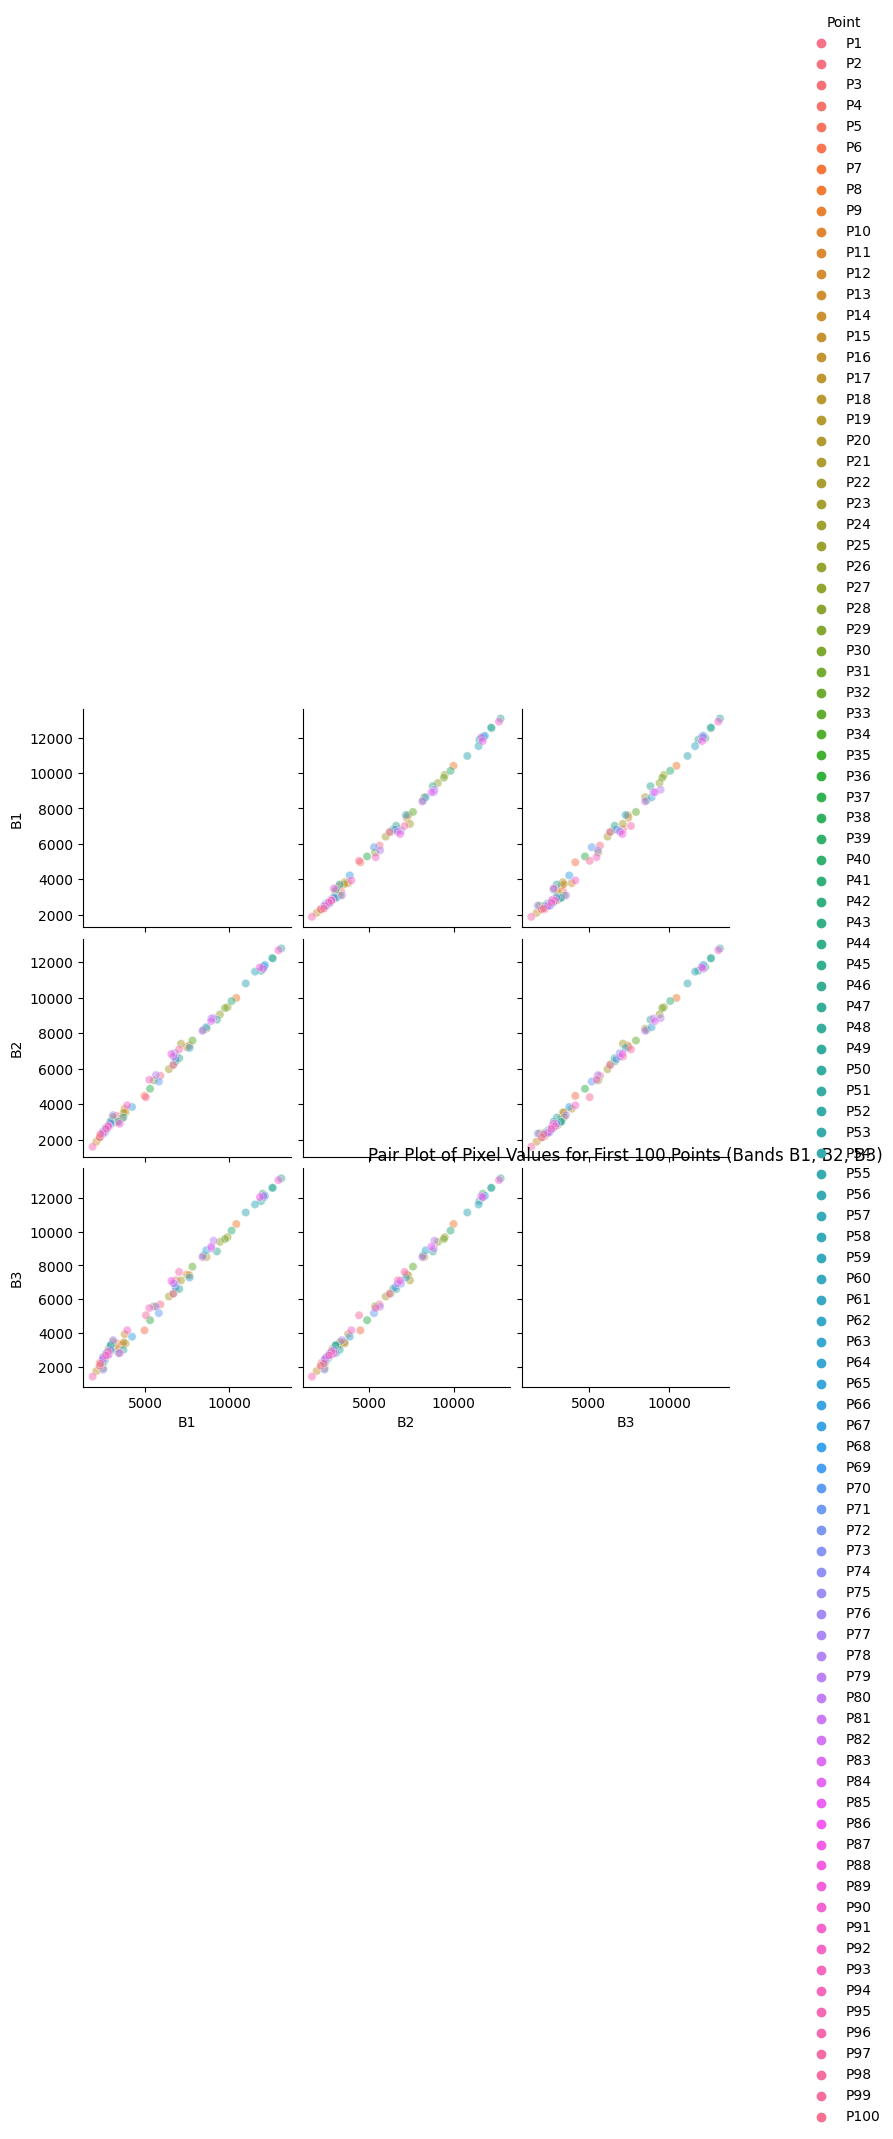

In [ ]:
import seaborn as sns
import pandas as pd

# Convert the pixel values to a DataFrame for Seaborn
df = pd.DataFrame(pixel_values_by_point[:, :3], columns=['B1', 'B2', 'B3'])

# Add point labels to the DataFrame
df['Point'] = [f'P{i + 1}' for i in range(len(df))]

# Create a pair plot without the legend
sns.pairplot(df, hue='Point', markers='o', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.title('Pair Plot of Pixel Values for First 100 Points (Bands B1, B2, B3)')
plt.show()



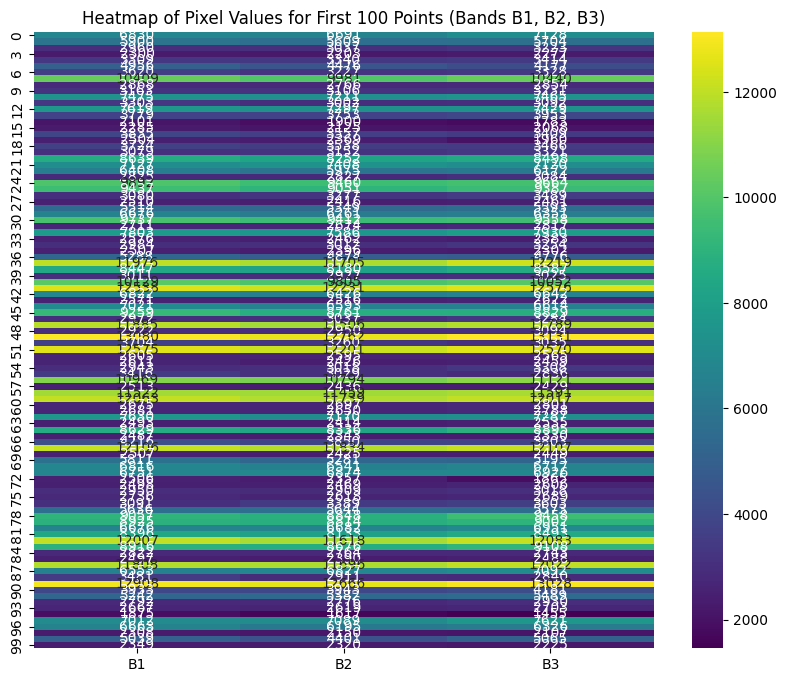

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('Point', axis=1), cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Pixel Values for First 100 Points (Bands B1, B2, B3)')
plt.show()

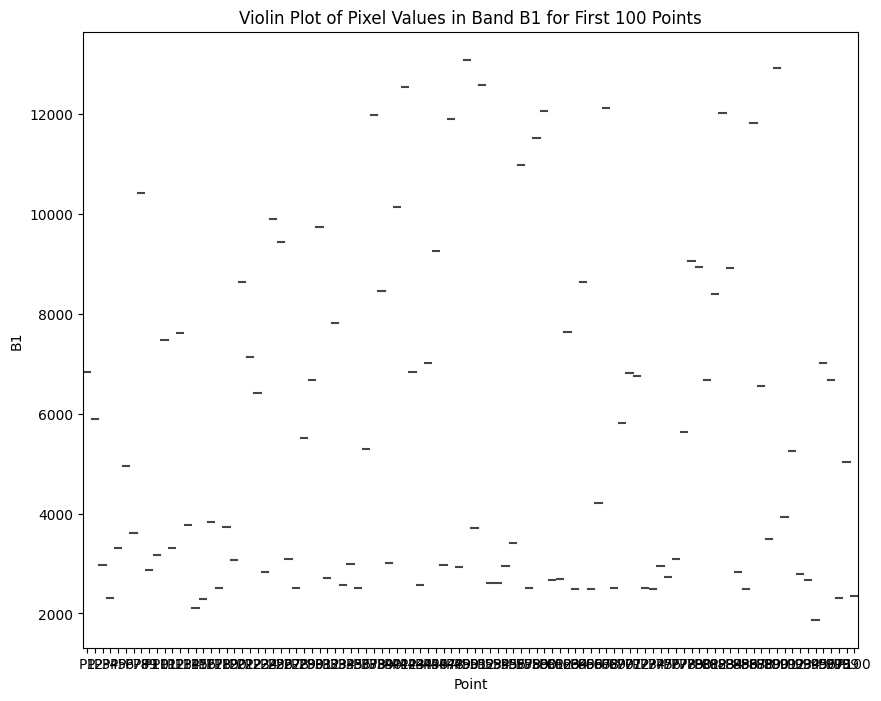

In [ ]:
# Create a violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Point', y='B1', data=df)
plt.title('Violin Plot of Pixel Values in Band B1 for First 100 Points')
plt.show()

In [ ]:
#Historgam
import matplotlib.pyplot as plt
imahe

In [ ]:
plt.figure(figsize=(15, 8))
for band_index in range(image_data.shape[0]):
    plt.subplot(2, 3, band_index + 1)
    plt.hist(image_data[band_index].ravel(), bins='auto', color=f'C{band_index}', alpha=0.7)
    plt.title(f'Histogram - Band {band_index + 1}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1500x800 with 0 Axes>

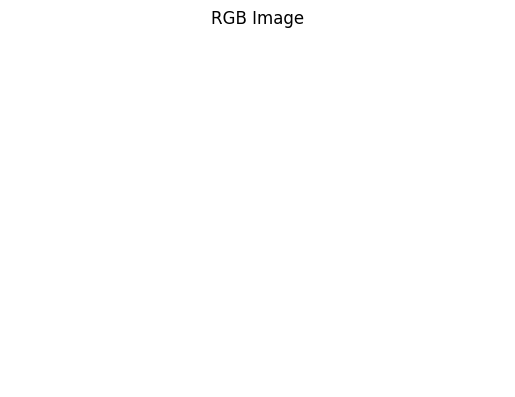

In [ ]:
rgb_image = np.transpose(image_data[:3, :, :], (1, 2, 0))
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))
for band_index in range(image_data.shape[0]):
    plt.scatter(image_data[band_index].ravel(), image_data[(band_index + 1) % 6].ravel(), label=f'Band {band_index + 1}', alpha=0.5)

plt.title('Scatter Plot of Pixel Values')
plt.xlabel('Band X')
plt.ylabel('Band Y')
plt.legend()
plt.show()
